# Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
dataset = pd.read_csv("C:/Users/Sony/Desktop/Data-Science-Training/4. Regression/Salary_Data.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
# Seperate the Independent and Dependent Variable

# Indepdent Variable
X = dataset.iloc[ : , 0:1]

In [5]:
# Dependent Variable
y = dataset.iloc[ : , -1]

In [6]:
type(y)

pandas.core.series.Series

In [7]:
###### X and y are converted to array
X = dataset.iloc[ : , 0:1].values

In [8]:
type(X)

numpy.ndarray

In [9]:
y = dataset.iloc[ : , -1].values

In [10]:
type(y)

numpy.ndarray

# Split our data into Training and Test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
X_train.shape

(24, 1)

In [14]:
X_test.shape

(6, 1)

# Build a Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
regressorDT = DecisionTreeRegressor()

In [17]:
#### Train my DT
regressorDT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
### Test the output
y_pred = regressorDT.predict(X_test)

In [19]:
# Compare the result
y_output = y_pred.copy()

In [20]:
y_output 

array([ 46205. , 121872. ,  56375.5,  56375.5, 112635. , 105582. ])

In [21]:
y_output = pd.DataFrame(y_output)

In [22]:
y_output

0
0   46205.0
1  121872.0
2   56375.5
3   56375.5
4  112635.0
5  105582.0

In [23]:
y_output.columns = ['prediction']

In [24]:
y_output

prediction
0     46205.0
1    121872.0
2     56375.5
3     56375.5
4    112635.0
5    105582.0

In [25]:
y_output = y_output.join(pd.DataFrame(y_test))

In [26]:
y_output.columns = ['prediction', 'Actual']

In [27]:
y_output

prediction    Actual
0     46205.0   37731.0
1    121872.0  122391.0
2     56375.5   57081.0
3     56375.5   63218.0
4    112635.0  116969.0
5    105582.0  109431.0

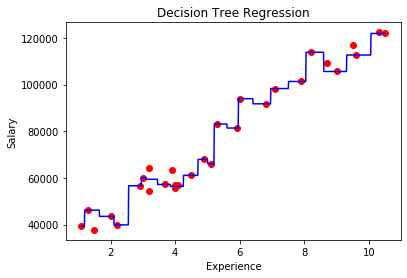

In [28]:
#### Visualize my tree
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressorDT.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [29]:
###### Model Evaluation

In [30]:
regressorDT.score(X_test, y_test)

0.9764754205531827

In [31]:
print("Accuracy of my Decision Tree is ", (regressorDT.score(X_test, y_test) * 100))

Accuracy of my Decision Tree is  97.64754205531827


In [ ]:
regressorDT.feature_importances_

### H.w : try to fit model (50_Startups.csv) with those 5 variable (4 , 1)

In [35]:
'''from sklearn.tree import export_graphviz
export_graphviz(regressorDT, 'tree.dot', feature_names = ["SALARY"]) '''

'from sklearn.tree import export_graphviz\nexport_graphviz(regressorDT, \'tree.dot\', feature_names = ["SALARY"]) '

In [ ]:
# convert the.dot file to .png fil
#! dot -Tpng tree.dot -o tree.png

In [36]:
# To display the tree
'''import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)'''

"import cv2\n%matplotlib inline\nimg = cv2.imread('tree.png')\nplt.figure(figsize = (20, 20))\nplt.imshow(img)"

In [32]:
from sklearn.tree import plot_tree

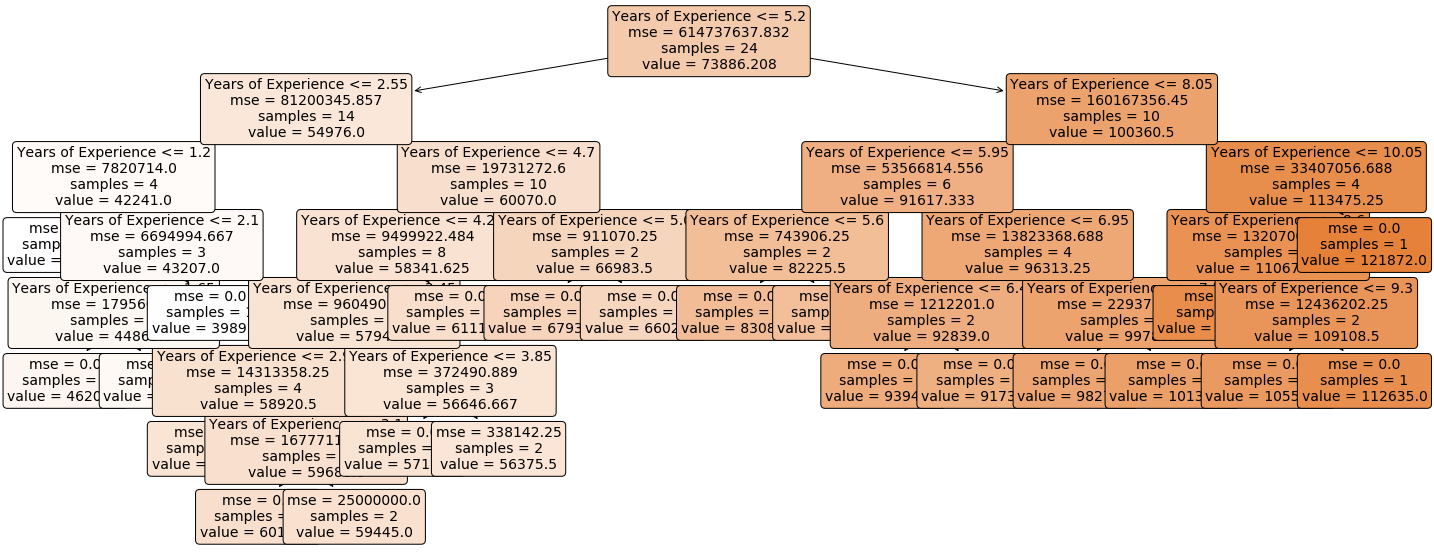

In [34]:
plt.figure(figsize=(25,10))
a = plot_tree(regressorDT, 
              feature_names= ['Years of Experience'], # X column names 
              class_names=['Salary'], 
              filled=True, 
              rounded=True, 
              fontsize=14)